#Importing Libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statistics
from scipy import stats

#Importing Dataset

In [2]:
dataset = pd.read_csv("data.csv")

In [4]:
dataset.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [7]:
for i in dataset.columns:
  print(i)

Mthly_HH_Income
Mthly_HH_Expense
No_of_Fly_Members
Emi_or_Rent_Amt
Annual_HH_Income
Highest_Qualified_Member
No_of_Earning_Members


#Mean
Mean is the sum of all the elements divided by the number of elements. The mathematical notation for the following is:
$$ Mean = \sum\limits_{i=1}^n x_i $$
It is the measure of central tendency of data. Mean is affected by outliners in a data. It is used for univariate analysis of numerical columns. Its time complexity is: $ n $

In [33]:
categorical_col = ["Highest_Qualified_Member"]

In [34]:
means = []
col = []
for i in dataset.columns:
  if i not in categorical_col:
    column = dataset.loc[:, i].values
    col.append(i)
    sum = 0
    for j in column:
      sum+=j
    means.append(sum / dataset.shape[0])
  else:
    continue
for i in range(len(means)):
  print(f"{col[i]} : {means[i]}")

Mthly_HH_Income : 41558.0
Mthly_HH_Expense : 18818.0
No_of_Fly_Members : 4.06
Emi_or_Rent_Amt : 3060.0
Annual_HH_Income : 490019.04
No_of_Earning_Members : 1.46


In [35]:
dataset.mean()

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

#Median
Median is the mid value of a data column. The median value is calculated after ordering the data in ascending order. It is a univariate analysis of central tendency like mean. It is robust to outliners unlike mean. To calculate the median of a data column, first we have to sort it in ascening order. If the number of elements in the data columns is odd, then median is equal to:
$$ Median=\frac{(n+1)}{2}^{th} $$ 
If the number of elements in the data columns is even, then median is equal to:
$$ Median = avg\left( \frac{n}{2}^{th}, \frac{n+1}{2}^{th} \right) $$
It is also used for numberical columns in the dataset. It time complexity is:
$ n\log\left(n\right) $

In [36]:
median = []
col = []
for i in dataset.columns:
  sorted = []
  if i not in categorical_col:
    col.append(i)
    column = dataset.loc[:, i].values
    for j in column:
      sorted.append(j)
    sorted.sort()
    if len(sorted) % 2 == 1:
      index = int((len(sorted)) / 2)
      median.append(sorted[index])
    else:
      left, right = int((len(sorted) - 1) / 2), int((len(sorted)) / 2)
      med = (sorted[left] + sorted[right]) / 2
      median.append(med)
for i in range(len(median)):
  print(f"{col[i]} : {median[i]}")

Mthly_HH_Income : 35000.0
Mthly_HH_Expense : 15500.0
No_of_Fly_Members : 4.0
Emi_or_Rent_Amt : 0.0
Annual_HH_Income : 447420.0
No_of_Earning_Members : 1.0


In [37]:
dataset.median()

Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
dtype: float64

#Mode
Mode is the most frequent value in a data column. If a column contains one mode then it is called unimodal, if i contains two modes then it is called bimodal and if it contains more than two then it is called multimodal. This is used for univariate analysis of central tendency of a categorical column as well as numerical column.

In [38]:
dataset.mode()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,45000,25000,4,0,590400,Graduate,1


#Variance
It is a measure of how data is spread around mean. It is used for univariate analysis of tendency of spread/ distribution. Formulae for calculating variance of a data column is given as follows:
$$ \sigma^2 = \frac{\sum\limits_{i=1}^n \left(x_i\ - \ \mu_x\right)^{2}}{n} $$
where $\sigma^2$ is the variance,  $\mu_x$ is the mean of the data column and $n$ is the number of elements in the data column. 

In [49]:
variance = []
prev = False
for index, i in enumerate(dataset.columns):
  sum = 0
  if i not in categorical_col:
    if prev == False:
      column = dataset.loc[:, i].values
      for j in column:
        sum+=pow((j - means[index]), 2)
      variance.append(sum/(len(column)-1))
    else:
      column = dataset.loc[:, i].values
      for j in column:
        sum+=pow((j - means[index-1]), 2)
      variance.append(sum/(len(column)-1))
  else:
    prev = True
    continue
for i in range(len(variance)):
  print(f"{col[i]} : {variance[i]}")

Mthly_HH_Income : 681100853.0612245
Mthly_HH_Expense : 146173342.85714287
No_of_Fly_Members : 2.302448979591837
Emi_or_Rent_Amt : 38955510.20408163
Annual_HH_Income : 102486925397.91666
No_of_Earning_Members : 0.5391836734693878


In [50]:
dataset.var()

Mthly_HH_Income          6.811009e+08
Mthly_HH_Expense         1.461733e+08
No_of_Fly_Members        2.302449e+00
Emi_or_Rent_Amt          3.895551e+07
Annual_HH_Income         1.024869e+11
No_of_Earning_Members    5.391837e-01
dtype: float64

#Standard Deviation
Standard deviation is the square root of variance. It is also a univariate analysis of tendency of spread/ distribution of data in a column. Standard deviation of a data with variance($\sigma^2$) is defined as:
$$ Standard \ Deviation = \sqrt\sigma^2 $$

In [51]:
variance = []
prev = False
for index, i in enumerate(dataset.columns):
  sum = 0
  if i not in categorical_col:
    if prev == False:
      column = dataset.loc[:, i].values
      for j in column:
        sum+=pow((j - means[index]), 2)
      variance.append(sum/(len(column)-1))
    else:
      column = dataset.loc[:, i].values
      for j in column:
        sum+=pow((j - means[index-1]), 2)
      variance.append(sum/(len(column)-1))
  else:
    prev = True
    continue
for i in range(len(variance)):
  print(f"{col[i]} : {variance[i]**0.5}")

Mthly_HH_Income : 26097.908978713687
Mthly_HH_Expense : 12090.216824240286
No_of_Fly_Members : 1.5173822786601394
Emi_or_Rent_Amt : 6241.434947516607
Annual_HH_Income : 320135.79212252516
No_of_Earning_Members : 0.7342912729083656


In [52]:
dataset.std()

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

#Correlation
Correlation refers to the relationship between 2 columns in a dataset. Correlation is a bivariate analysis of data. It can be calculated using covariance of the dataset whose correlation is to be calculated. Covariance of data column x and y is defined as :
$$ cov(x,y)= \sum\limits_{i=1}^n\left(x_i - \mu_x \right)\left(y_i - \mu_y \right) $$
Correlation of data column x and y with covariance of $ cov(x, y) $ is defined as :
$$ Pearson's \ Coefficient(x,y) \ = \ \frac{cov(x,y)}{\sigma^x * \sigma^y}  $$
Correlation is used for linear relationship and is not useful for non linear relationships. Value of Pearson's Correlation Coefficient lies between 0 and 1.

In [53]:
dataset.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


#Normal Distribution
Normal distribution is the most common type of distribution that is found in nature. The graph of a normal distribution is a bell shaped curve which is symmetric. The format to write that a column in a dataset follows the normal distribution(taking example of weight, height and gender dataset of India):
$$ height \ follows \ N\left(\mu, \sigma^2 \right) $$
where $\mu, \sigma^2$ are the mean and variance of the height column respectively.
The probability Distribution function(PDF) formulae for normal distribution is as follows:
$$ \frac{1}{\sqrt{2\pi}\sigma} * e^{\{ -\frac{(x-\mu)^2}{2\sigma^2} \}} $$
Changing the $\mu$ of the normal distribution with the value of -, + k shifts it left or right on the graph respectively by a value of k. $\mu$ also gets changes by +- k. 
Changing the variance of the distribution results in changed spread of the distribution which can be visualised better with a graphical representation.
<br>
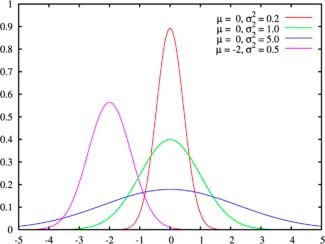
$$Visualisation \ of \ Changing \ sigma \ and \ mean \ of \ the \ normal \ distribution$$


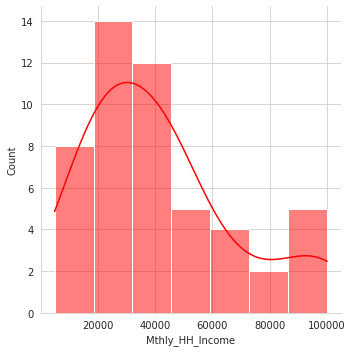

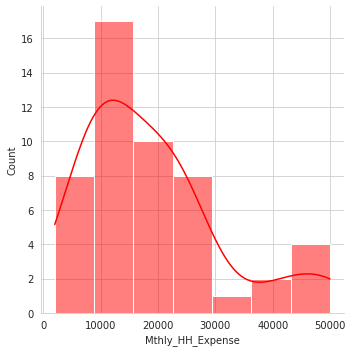

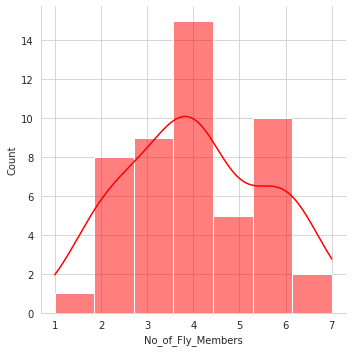

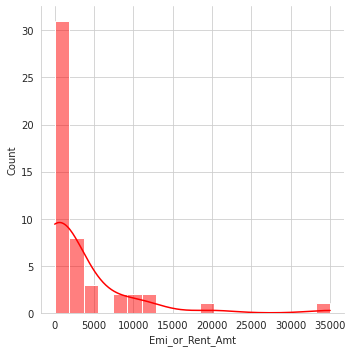

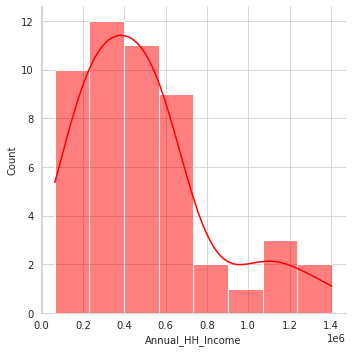

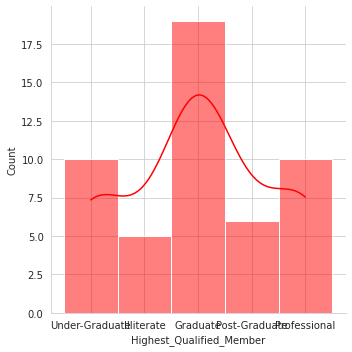

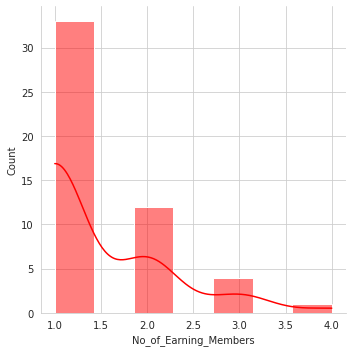

In [95]:
sns.set_style("whitegrid")
for i in range(len(dataset.columns)):
  sns.displot(data=dataset.iloc[:, i], kde=True, color="red")
plt.show()

#Feature of Normal Distribution
Main features of a normal distribution are:
1. It is the most common distribution that occurs in nature.
2. The graph of normal distribution depends on $\mu$ and $\sigma^2$.
3. It has a Bell shaped Curve.
4. It is a symmetric curve.
5. It follows the 68% - 95% - 99.7% rule.

According the the 68% - 95% - 99.7% rule, 68% of the data will fall inside the $\mu \pm \sigma$, 95% of the data will fall inside $\mu \pm 2 * \sigma$ and 99.7% data will lie between $\mu \pm 3 * \sigma$, where $\mu$ and $\sigma$ are the mean and standard deviation of the given data respectively.

#Positive Skewed & Negatively Skewed Normal Distribution
Skewedness is due to outliners.


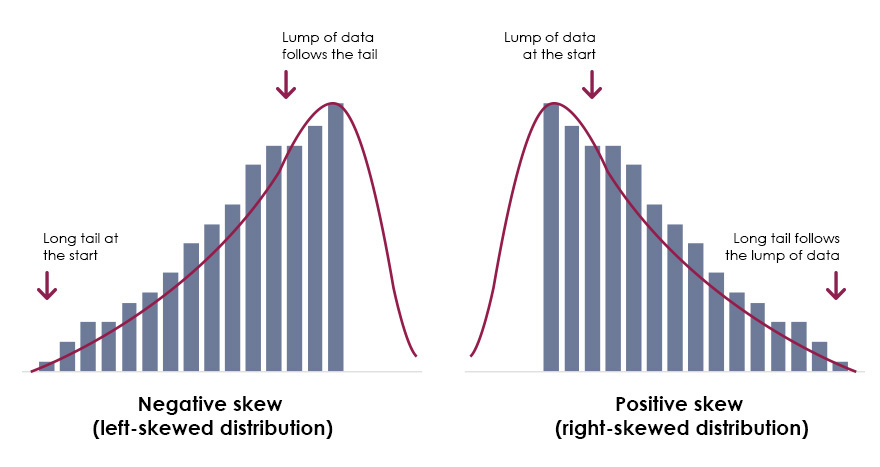

Negative Skewed means a flatter left hand side. It is called negatively skewed because it has a long left tail as compared to right hand side. The mean is also to the left of the peak. It is also called as Left Skewed.
Positive Skewed means a flatter right hand side. It is called positively skewed because it has a long right tail as compared to left hand side. Mean is also to the right of the peak. It is also called Right Skewed.

In [98]:
for i in range(len(dataset.columns)):
  if dataset.columns[i] not in categorical_col:
    print(f"{dataset.columns[i]} : Skewness : {dataset.iloc[:, i].skew()}, Kurtosis : {dataset.iloc[:, i].kurt()}")
  else:
    continue

Mthly_HH_Income : Skewness : 0.9246148763777229, Kurtosis : 0.11555007146606489
Mthly_HH_Expense : Skewness : 1.1994608030097127, Kurtosis : 0.9424897886350738
No_of_Fly_Members : Skewness : 0.11367415455857431, Kurtosis : -0.8514445579758396
Emi_or_Rent_Amt : Skewness : 3.403679844103547, Kurtosis : 14.202522820819258
Annual_HH_Income : Skewness : 1.1929490975818218, Kurtosis : 1.1012908548129197
No_of_Earning_Members : Skewness : 1.5933009869600223, Kurtosis : 2.0932124169928983


#Effect on Mean, Median and Mode due to Skewness
Skewness is caused by outliners. As mode is not affected even a bit by outliners, hence value of mode doesnt change due to skewness. Median has a little effect due to outliners and hence gets little shifted to left and right hand side on negative and positively skewed data respectively. Mean has a huge effect of outliners and hance gets displaced by a lot to the left and right in case of negative and positively skewed data respectively. 

#Explain QQ Plot and show the implementation of the same
QQPlot short for (Quantile Quantile Plot) is a way to test the normality of distribution. It can help in telling if columnn that has been plotted is normally distributed or not.
The observed quanities are taken on the y axis of the plot and theoritical quantities are taken on the x axis. If all the scatter plot of the Quantile Quantile Plot fall on a line with an angle of 45 degrees, then the plot is normally distributed otherwise it is not. 

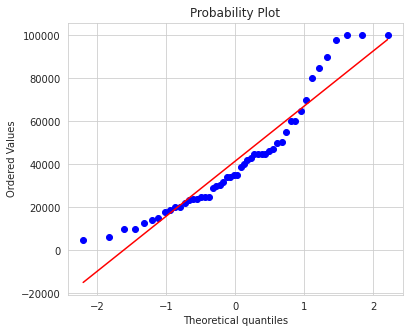

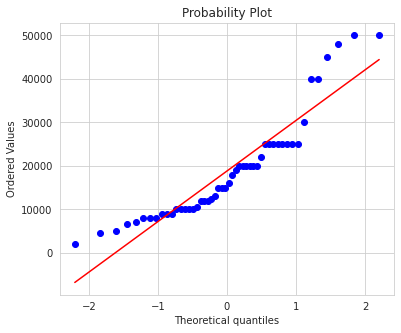

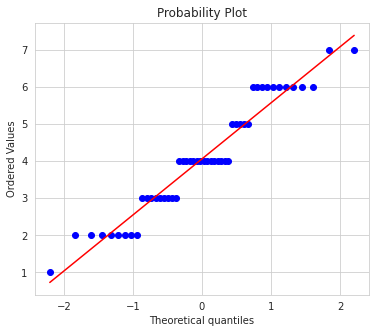

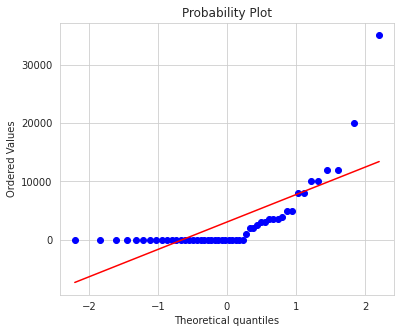

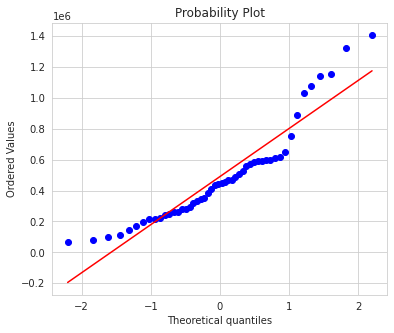

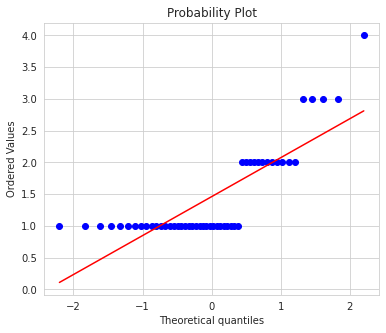

In [119]:
for i in range(len(dataset.columns)):
  if dataset.columns[i] not in categorical_col:
    fig = plt.figure(figsize=(6,5))
    stats.probplot(dataset.iloc[:, i], dist="norm", plot=plt)
    plt.show()
  else:
    continue

#Explain Box Cox and show the implementation of the same
Box Cox transformation can be applied to a non normal dependent variable and the output returns values that have normal distribution. For example: 

Think of 2 variables having a Log Normal and Pareto distribution respectively. If we apply Box Cox transformation to both of them, the result of the transformation will be data points that are normally distributed. 

It helps us in converting the data into normally distributed and then perform statistical tests on the data that require a normally distributed data.

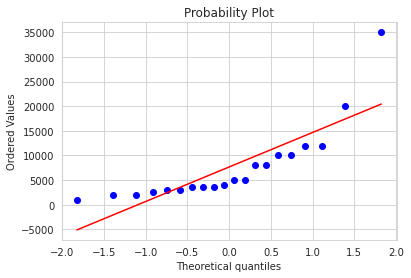

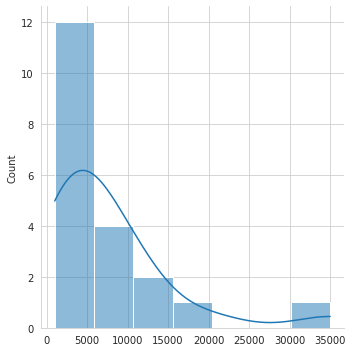

-0.14458018913656778


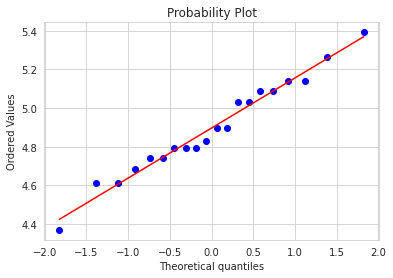

In [143]:
X = dataset.iloc[:, 3].values
X_positive = []
# Converting X into positive values as box cox transformation requires strictly positive values
for i in X:
  if i > 0:
    X_positive.append(i)
fig = plt.figure()
stats.probplot(X_positive, dist="norm", plot = plt)
plt.show()
sns.displot(X_positive, kde=True)
plt.show()
X_t, l = stats.boxcox(X_positive)
print(l)
fig = plt.figure()
stats.probplot(X_t, dist="norm", plot=plt)
plt.show()